## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data

In [2]:
data = pd.read_csv('50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## Exploratory Data Analysis

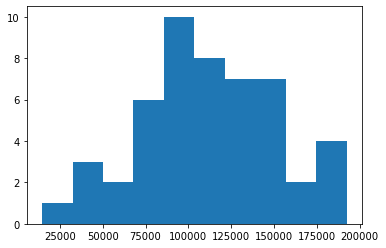

In [7]:
plt.hist(data['Profit'])
plt.show()

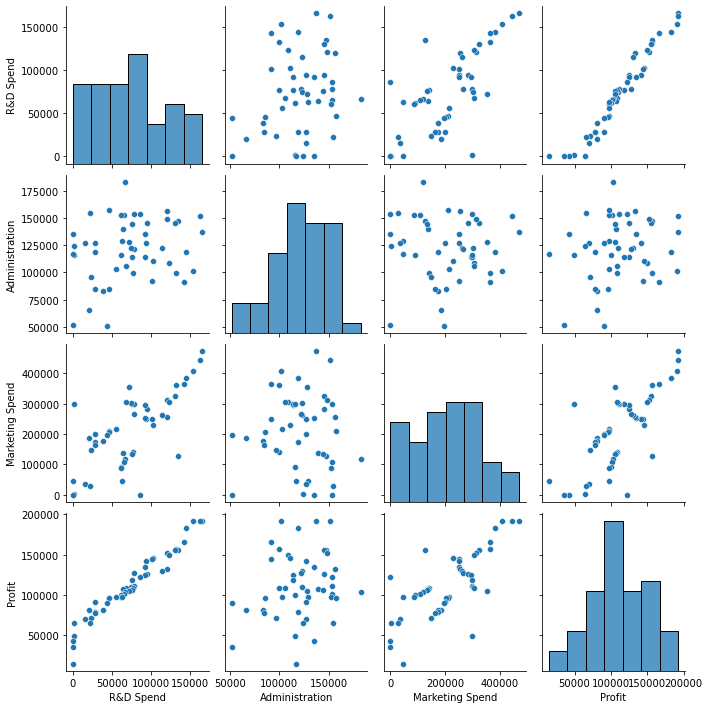

In [8]:
sns.pairplot(data=data)

<AxesSubplot:>

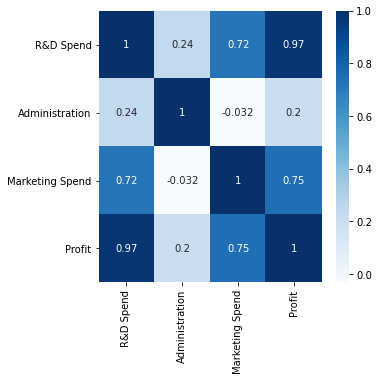

In [9]:
plt.figure(figsize = [5,5])
sns.heatmap(data.corr(), annot=True, cmap = 'Blues')

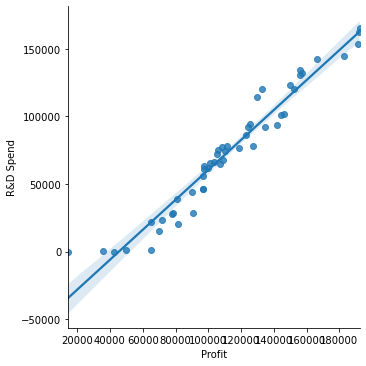

In [10]:
sns.lmplot(x='Profit',y='R&D Spend', data=data)

R&D Spend and Profit are highly correlated.

## Label Encoding of State variable

In [11]:
data['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['State'] = l.fit_transform(data['State'])


# California- 0
# Florida - 1
# New York - 2

In [13]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [14]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

## Features and Target

In [15]:
X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = data['Profit']

## Data Modeling

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=342)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
print(lm.coef_)

[ 8.01200988e-01 -2.84103375e-02  2.43498063e-02  1.42657278e+03]


In [21]:
y_pred = lm.predict(X_test)
print(y_pred)

[102875.48149841  69010.20919412 152352.71338098 180621.66420933
  97452.2896648  100402.09444669 117786.71049711 125205.32939581
 151992.55357894 185979.64688062  99228.28586537  45350.52971317
 130649.53658886  73075.65962241  87047.41230916]


## Actual vs Predicted Values

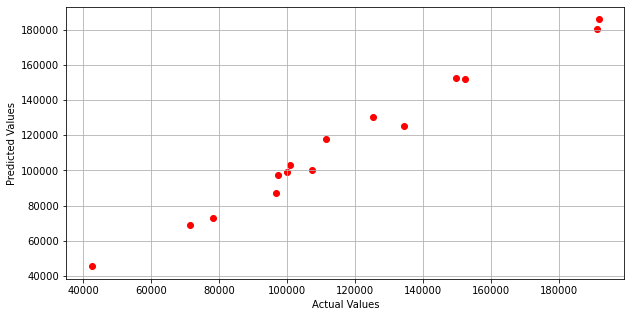

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, c = 'red')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.grid()

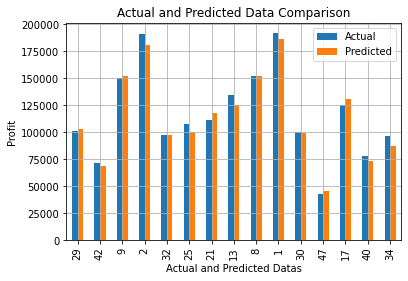

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.plot(kind = 'bar')
plt.ylabel('Profit')
plt.xlabel('Actual and Predicted Datas')
plt.title('Actual and Predicted Data Comparison')
plt.grid()

## Model Evaluation

In [24]:
from sklearn import metrics
from math import sqrt

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4641.569722725003
MSE: 32602829.856850218
RMSE: 5709.888777975471


In [25]:
print('R-Square:', metrics.r2_score(y_test,y_pred))

R-Square: 0.979906903021387


As we can see we have got the r-square value of 98%, we can conclude that our fitted regression model is good for future predictions.